In [119]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [120]:
#Loading dataset
wine = pd.read_csv('C:/Users/SIVA/keras/wq.csv')

In [121]:
#Let's check how the data is distributed
wine.head()

,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol,quality
0,0.00,0.076,11.0,34.0,3.51,9.4,5
1,0.00,0.098,25.0,67.0,3.20,9.8,5
2,0.04,0.092,15.0,54.0,3.26,9.8,5
3,0.56,0.075,17.0,60.0,3.16,9.8,6
4,0.00,0.076,11.0,34.0,3.51,9.4,5


In [122]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   citric acid           1599 non-null   float64
 1   chlorides             1599 non-null   float64
 2   free sulfur dioxide   1599 non-null   float64
 3   total sulfur dioxide  1599 non-null   float64
 4   pH                    1599 non-null   float64
 5   alcohol               1599 non-null   float64
 6   quality               1599 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 87.6 KB


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

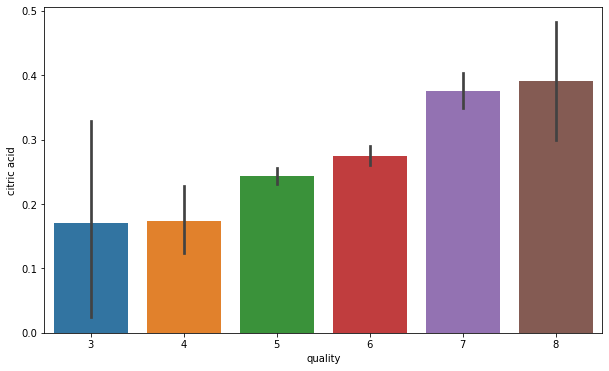

In [123]:
#Composition of citric acid go higher as we go higher in the quality of the wine.
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

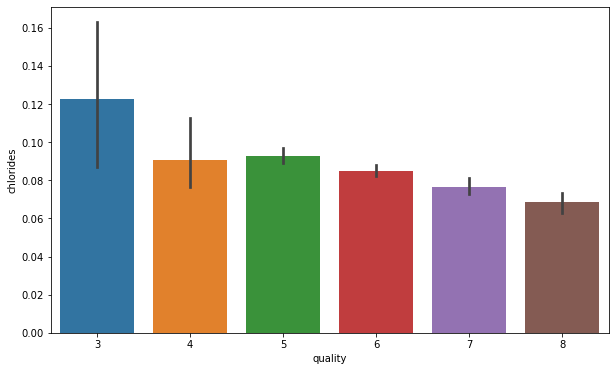

In [124]:
#Composition chloride also go down as we go higher in the quality of the wine.
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

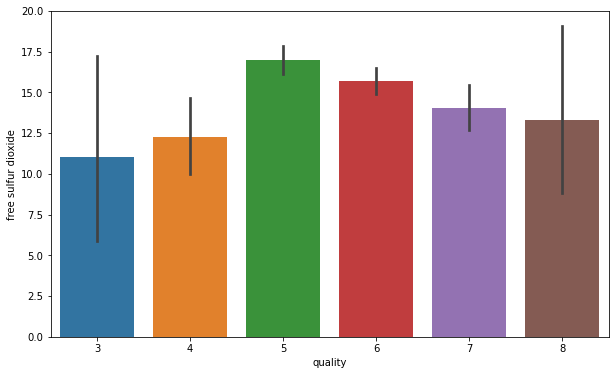

In [125]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

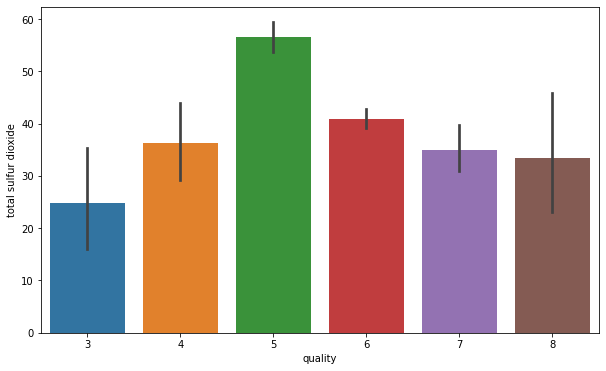

In [126]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

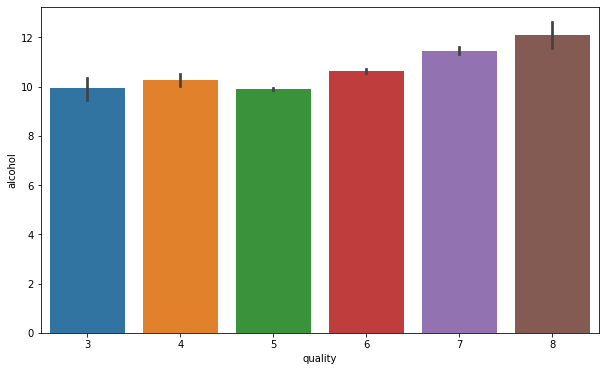

In [127]:
#Alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [128]:
#Making binary classification for the response variable.
#Dividing wine as good and bad by giving the limit for the quality 
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [129]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [130]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [131]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

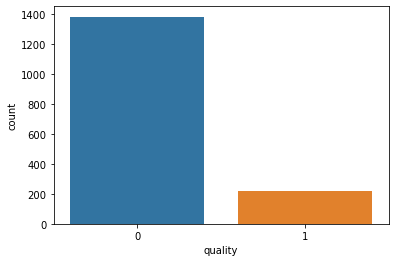

In [132]:
sns.countplot(wine['quality'])

In [133]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [134]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [135]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [136]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [137]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [138]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       273
           1       0.52      0.30      0.38        47

    accuracy                           0.86       320
   macro avg       0.70      0.63      0.65       320
weighted avg       0.83      0.86      0.84       320



In [139]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[260  13]
 [ 33  14]]


In [108]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [109]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       273
           1       0.36      0.30      0.33        47

    accuracy                           0.82       320
   macro avg       0.62      0.60      0.61       320
weighted avg       0.81      0.82      0.81       320



In [111]:
print(confusion_matrix(y_test, pred_sgd))

[[248  25]
 [ 33  14]]


In [112]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [113]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       273
           1       0.62      0.11      0.18        47

    accuracy                           0.86       320
   macro avg       0.75      0.55      0.55       320
weighted avg       0.83      0.86      0.81       320



In [114]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [115]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [116]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.1, 'gamma': 0.8, 'kernel': 'rbf'}

In [117]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.60      0.26      0.36        47

    accuracy                           0.87       320
   macro avg       0.74      0.61      0.64       320
weighted avg       0.84      0.87      0.84       320



In [118]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9007197342519685